# Logistic Regression

In [1]:
# import packages
from sklearn.linear_model import LogisticRegression
from scipy.stats import reciprocal

# import functions
from ipynb.fs.full.Functions import load_train_test_data, load_train_test_oversampled, model_eval, run_gridsearchCV, run_randomizedsearchCV, load_model

# turn of warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the preprocessed data set
X_train, X_test, y_train, y_test = load_train_test_data()

A snippet of our training data:


,Age,PhysicallyActive,BMI,Sleep,SoundSleep,JunkFood,Stress,BPLevel,Pregnancies,UrinationFreq,BMI_high,highBP_yes,RegularMedicine_yes,Pdiabetes_yes,Alcohol_yes,Gender_Male,Smoking_yes,Family_Diabetes_yes
188,3.0,0.0,-0.514087,-0.775318,-0.293345,0.0,1.0,2.0,-0.416387,0.0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
145,0.0,2.0,-1.261602,0.026431,-0.293345,0.0,0.0,1.0,-0.416387,0.0,0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
87,3.0,1.0,-2.009116,-2.378816,-0.838128,0.0,2.0,2.0,-0.416387,1.0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
262,3.0,2.0,-0.887844,0.828180,-0.838128,0.0,1.0,1.0,-0.416387,1.0,0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
45,1.0,1.0,-0.887844,-0.775318,0.251438,0.0,1.0,0.0,-0.416387,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


There are 232 entries with 18 columns in our training data.
There are 41 entries with 18 columns in our testing data.


In [3]:
# reload the preprocessed dataset with oversampled training data
X_train2, X_test2, y_train2, y_test2 = load_train_test_oversampled()

A snippet of our training data:


,Age,PhysicallyActive,BMI,Sleep,SoundSleep,JunkFood,Stress,BPLevel,Pregnancies,UrinationFreq,BMI_high,highBP_yes,RegularMedicine_yes,Pdiabetes_yes,Alcohol_yes,Gender_Male,Smoking_yes,Family_Diabetes_yes
0,0.0,2.0,1.354699,0.828180,-0.838128,0.0,1.0,1.0,-0.416387,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,1.0,0.794063,-0.775318,-1.927694,1.0,3.0,2.0,-0.416387,0.0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,3.0,1.0,0.420306,0.828180,1.341005,0.0,0.0,1.0,-0.416387,1.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,2.0,2.289092,0.828180,-0.838128,0.0,1.0,1.0,-0.416387,1.0,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,-0.514087,-1.577067,-0.293345,3.0,1.0,1.0,-0.416387,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


There are 258 entries with 18 columns in our training data.
There are 82 entries with 18 columns in our testing data.


# 1) Logistic Regression with normal preprocessed dataset
## Basic Model

In [4]:
# create a basic logistic regression model
log_model = LogisticRegression(random_state=0).fit(X_train, y_train)

In [5]:
print(log_model.coef_)

[[ 0.98988812  0.16376818  0.05032995  0.12103882  0.32114331  0.23276057
   0.08118471  0.53853998  0.3106258   0.1554614  -0.10376178  0.12598676
   1.42115259  0.97928462 -0.10840164  0.48320928  0.61119115  1.15349568]]



Evaluation: accuracy_score
83.19% for the train data
80.49% for the test data

Evaluation: f1_score
71.94% for the train data
63.64% for the test data

Evaluation: recall_score
66.67% for the train data
53.85% for the test data

Evaluation: precision_score
78.12% for the train data
77.78% for the test data

Evaluation: confusion_matrix


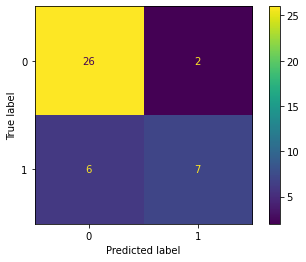


Evaluation: roc


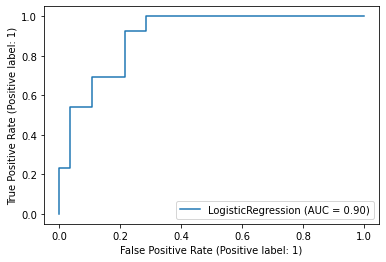

[(0.8318965517241379, 0.8048780487804879),
 (0.7194244604316546, 0.6363636363636364),
 (0.6666666666666666, 0.5384615384615384),
 (0.78125, 0.7777777777777778)]

In [6]:
# evaluate the basic model
model_eval(log_model,X_train, X_test, y_train, y_test, confusion=True, roc=True)

## Grid Search with 10-fold Cross-Validation

In [7]:
# define the grid for the hyperparameter search
grid_vals = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
            'max_iter': [10, 100, 1000], 
            'penalty': ['l1', 'l2'], 
            'solver': ['newton-cg', 'lbfgs', 'liblinear']}

In [8]:
# run the grid search based on accuracy
run_gridsearchCV(log_model, grid_vals, X_train, y_train)

Fitting 10 folds for each of 126 candidates, totalling 1260 fits
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=0.001, max_iter=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.001, max_iter=10, penalty=

[CV] END ....C=0.001, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.001, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.001, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.001, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=1

[CV] END ..C=0.01, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=0.01, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.01, max_i

[CV] END ....C=0.01, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.01, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=10

[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=1

[CV] END .....C=1, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=1, max_iter=

[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, max_iter=10

[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=1

[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=100, max_iter=

[CV] END .....C=100, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=100, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=100, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=100, max_iter=10

[CV] END .C=1000, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=1000, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=1000, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=1000, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=1000, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=1000, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=1000, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=1000, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=1000, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=1000, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=1000, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=1000, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=1000, max_it

[CV] END C=1000, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1000, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1000, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1000, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1000, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1000, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s

Best hyperparameters : {'C': 1, 'max_iter': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Best cross-validated accuracy : 0.806340579710145



Evaluation: accuracy_score
83.19% for the train data
80.49% for the test data

Evaluation: f1_score
71.94% for the train data
63.64% for the test data

Evaluation: recall_score
66.67% for the train data
53.85% for the test data

Evaluation: precision_score
78.12% for the train data
77.78% for the test data

Evaluation: confusion_matrix


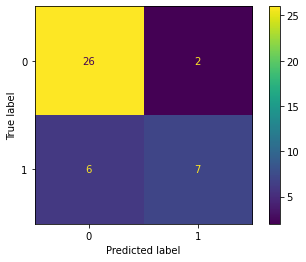


Evaluation: roc


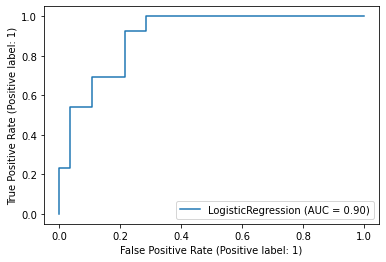

[(0.8318965517241379, 0.8048780487804879),
 (0.7194244604316546, 0.6363636363636364),
 (0.6666666666666666, 0.5384615384615384),
 (0.78125, 0.7777777777777778)]

In [9]:
# reload the best model & evaluate
acc_best_model_grid = load_model(log_model, 'accuracy')
model_eval(acc_best_model_grid,X_train, X_test, y_train, y_test, confusion=True, roc=True)

In [10]:
# run the grid search based on recall
run_gridsearchCV(log_model, grid_vals, X_train, y_train, scoring='recall')

Fitting 10 folds for each of 126 candidates, totalling 1260 fits
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=0.001, max_iter=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.001, max_iter=10, penalty=

[CV] END ....C=0.001, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.001, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.001, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.001, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.001, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.001, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.001, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.001, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.001, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=1

[CV] END ..C=0.01, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.01, max_iter=

[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=10

[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.1, max_iter=1

[CV] END .C=0.1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .........C=1, max_i

[CV] END ........C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=1, max_iter=1

[CV] END ....C=10, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=10, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=10, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=10, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=10, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=10, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=10, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=10, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ........C=10, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=10, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=10, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=10, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=10, max_i

[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, max_iter=10

[CV] END ..C=100, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=1

[CV] END ..C=1000, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=1000, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=1000, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=1000, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=1000, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=1000, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=1000, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=1000, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=1000, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=1000, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=1000, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=1000, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=1000, max_iter=

[CV] END C=1000, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1000, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1000, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1000, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1000, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1000, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1000, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1000, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1000, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1000, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, max_iter=10


Evaluation: accuracy_score
83.19% for the train data
78.05% for the test data

Evaluation: f1_score
72.34% for the train data
60.87% for the test data

Evaluation: recall_score
68.00% for the train data
53.85% for the test data

Evaluation: precision_score
77.27% for the train data
70.00% for the test data

Evaluation: confusion_matrix


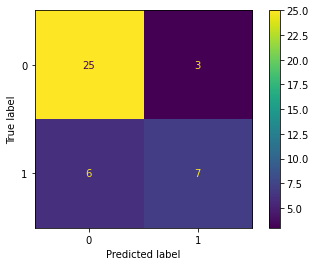


Evaluation: roc


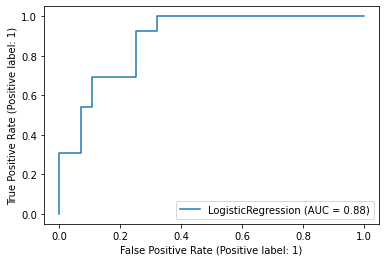

[(0.8318965517241379, 0.7804878048780488),
 (0.7234042553191491, 0.608695652173913),
 (0.68, 0.5384615384615384),
 (0.7727272727272727, 0.7)]

In [11]:
# reload the best model & evaluate
rec_best_model_grid = load_model(log_model, 'recall')
model_eval(rec_best_model_grid, X_train, X_test, y_train, y_test, confusion=True, roc=True)

## RandomSearch with 10-fold Cross-Validation

In [12]:
param_distribution = {'C': reciprocal(0.001, 1000).rvs(50), 
                      'max_iter': reciprocal(10, 1000).rvs(20), 
                      'penalty': ['l1', 'l2'], 
                      'solver': ['newton-cg', 'lbfgs', 'liblinear']}

In [13]:
# run random search based on accuracy
run_randomizedsearchCV(log_model, param_distribution, X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END C=0.2925375470394751, max_iter=141.26189475216722, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.2925375470394751, max_iter=141.26189475216722, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.2925375470394751, max_iter=141.26189475216722, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.2925375470394751, max_iter=141.26189475216722, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.2925375470394751, max_iter=141.26189475216722, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.2925375470394751, max_iter=141.26189475216722, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.2925375470394751, max_iter=141.26189475216722, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.2925375470394751, max_iter=141.26189475216722, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.2925375470394751, max_iter=141.26189475216722, penal

[CV] END C=2.3152023783352385, max_iter=49.11566312623199, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=2.3152023783352385, max_iter=49.11566312623199, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=2.3152023783352385, max_iter=49.11566312623199, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=2.3152023783352385, max_iter=49.11566312623199, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=2.3152023783352385, max_iter=49.11566312623199, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=2.3152023783352385, max_iter=49.11566312623199, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=2.3152023783352385, max_iter=49.11566312623199, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=2.3152023783352385, max_iter=49.11566312623199, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=2.3152023783352385, max_iter=49.11566312623199, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.052663437105210


Evaluation: accuracy_score
83.19% for the train data
78.05% for the test data

Evaluation: f1_score
72.34% for the train data
60.87% for the test data

Evaluation: recall_score
68.00% for the train data
53.85% for the test data

Evaluation: precision_score
77.27% for the train data
70.00% for the test data

Evaluation: confusion_matrix


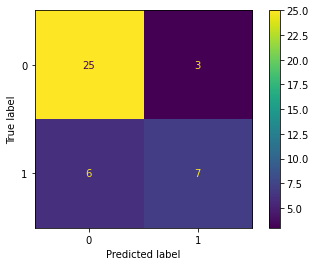


Evaluation: roc


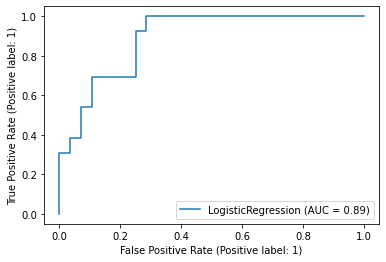

[(0.8318965517241379, 0.7804878048780488),
 (0.7234042553191491, 0.608695652173913),
 (0.68, 0.5384615384615384),
 (0.7727272727272727, 0.7)]

In [14]:
# reload the best model & evaluate
acc_best_model_random = load_model(log_model, 'accuracy', search='random')
model_eval(acc_best_model_random,X_train, X_test, y_train, y_test, confusion=True, roc=True)

In [15]:
# run random search based on recall
run_randomizedsearchCV(log_model, param_distribution, X_train, y_train, scoring='recall')

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END C=0.2925375470394751, max_iter=141.26189475216722, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.2925375470394751, max_iter=141.26189475216722, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.2925375470394751, max_iter=141.26189475216722, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.2925375470394751, max_iter=141.26189475216722, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.2925375470394751, max_iter=141.26189475216722, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.2925375470394751, max_iter=141.26189475216722, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.2925375470394751, max_iter=141.26189475216722, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.2925375470394751, max_iter=141.26189475216722, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.2925375470394751, max_iter=141.26189475216722, penal

[CV] END C=2.3152023783352385, max_iter=49.11566312623199, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=2.3152023783352385, max_iter=49.11566312623199, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=2.3152023783352385, max_iter=49.11566312623199, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=2.3152023783352385, max_iter=49.11566312623199, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=2.3152023783352385, max_iter=49.11566312623199, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=2.3152023783352385, max_iter=49.11566312623199, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=2.3152023783352385, max_iter=49.11566312623199, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=2.3152023783352385, max_iter=49.11566312623199, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=2.3152023783352385, max_iter=49.11566312623199, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.052663437105210


Evaluation: accuracy_score
83.19% for the train data
78.05% for the test data

Evaluation: f1_score
72.34% for the train data
60.87% for the test data

Evaluation: recall_score
68.00% for the train data
53.85% for the test data

Evaluation: precision_score
77.27% for the train data
70.00% for the test data

Evaluation: confusion_matrix


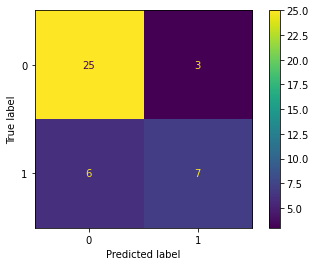


Evaluation: roc


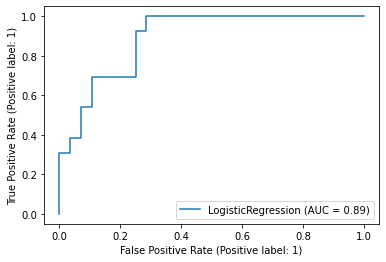

[(0.8318965517241379, 0.7804878048780488),
 (0.7234042553191491, 0.608695652173913),
 (0.68, 0.5384615384615384),
 (0.7727272727272727, 0.7)]

In [16]:
# reload the best model & evaluate
rec_best_model_random = load_model(log_model, 'recall', search='random')
model_eval(rec_best_model_random, X_train, X_test, y_train, y_test, confusion=True, roc=True)

# 2) Logistic Regression with oversampled preprocessed dataset
## Basic Model

In [17]:
# create a basic logistic regression model
log_model2 = LogisticRegression(random_state=0).fit(X_train2, y_train2)

In [18]:
print(log_model2.coef_)

[[ 1.74696486  0.17162913 -0.05749441  0.41408044  0.38454534  0.55563688
  -0.44257192  0.21331938  0.22625879  0.14989489 -0.06564835  0.18904821
   2.06912384 -0.19720097 -0.13998899  0.5634226   1.10490824  1.41531272]]



Evaluation: accuracy_score
88.76% for the train data
68.29% for the test data

Evaluation: f1_score
88.80% for the train data
51.85% for the test data

Evaluation: recall_score
89.15% for the train data
53.85% for the test data

Evaluation: precision_score
88.46% for the train data
50.00% for the test data

Evaluation: confusion_matrix


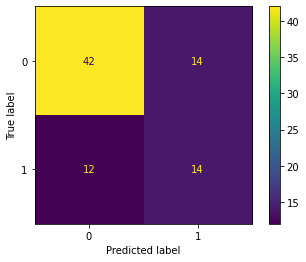


Evaluation: roc


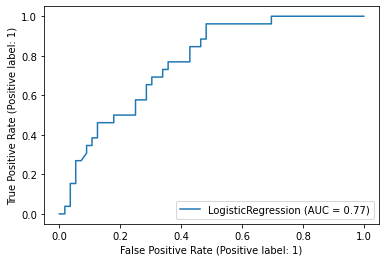

[(0.8875968992248062, 0.6829268292682927),
 (0.888030888030888, 0.5185185185185186),
 (0.8914728682170543, 0.5384615384615384),
 (0.8846153846153846, 0.5)]

In [19]:
# evaluate the basic model
model_eval(log_model2, X_train2, X_test2, y_train2, y_test2, confusion=True, roc=True)

## Grid Search with 10-fold Cross-Validation

In [20]:
# run the grid search based on accuracy
run_gridsearchCV(log_model2, grid_vals, X_train2, y_train2, ros='ros')

Fitting 10 folds for each of 126 candidates, totalling 1260 fits
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=0.001, max_iter=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.001, max_iter=10, penalty=

[CV] END ....C=0.001, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.001, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.001, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=1

[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=0.01, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.01, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.01, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.01, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.01, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.01, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.01, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.01, max_i

[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=10

[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=1

[CV] END .....C=1, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=1, max_iter=

[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, max_iter=10

[CV] END .......C=10, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=1

[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=100, max_iter=

[CV] END .C=100, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=100, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=100, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=100, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=100, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=100, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=100, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=100, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=100, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=100, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=100, max_ite

[CV] END ..C=1000, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1000, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1000, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1000, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1000, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1000, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1000, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=1000, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=1000, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=1000, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=1000, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=1000, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=1000, max_iter=1

[CV] END C=1000, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=1000, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=1000, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=1000, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=1000, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=1000, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=1000, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=1000, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=1000, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=1000, max_ite


Evaluation: accuracy_score
89.53% for the train data
67.07% for the test data

Evaluation: f1_score
89.58% for the train data
49.06% for the test data

Evaluation: recall_score
89.92% for the train data
50.00% for the test data

Evaluation: precision_score
89.23% for the train data
48.15% for the test data

Evaluation: confusion_matrix


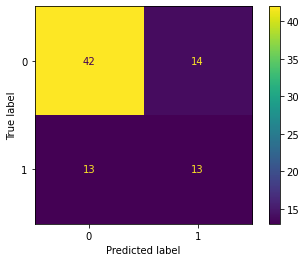


Evaluation: roc


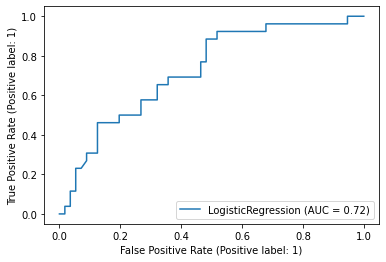

[(0.8953488372093024, 0.6707317073170732),
 (0.8957528957528959, 0.49056603773584906),
 (0.8992248062015504, 0.5),
 (0.8923076923076924, 0.48148148148148145)]

In [21]:
# reload the best model & evaluate
acc_best_model2 = load_model(log_model2, 'accuracy', ros='ros')
model_eval(acc_best_model2, X_train2, X_test2, y_train2, y_test2, confusion=True, roc=True)

In [22]:
# run the grid search based on recall
run_gridsearchCV(log_model2, grid_vals, X_train2, y_train2, ros='ros', scoring='recall')

Fitting 10 folds for each of 126 candidates, totalling 1260 fits
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=0.001, max_iter=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.001, max_iter=10, penalty=

[CV] END ....C=0.001, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.001, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.001, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.001, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.001, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.001, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=1

[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=0.01, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.01, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.01, max_i

[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=10

[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=1

[CV] END .....C=1, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=1, max_iter=

[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, max_iter=10

[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=1

[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=100, max_iter=

[CV] END .C=100, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=10

[CV] END .C=1000, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1000, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1000, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1000, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1000, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1000, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1000, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=1000, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=1000, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=1000, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=1000, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=1000, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=1000, max_iter=1


Evaluation: accuracy_score
77.52% for the train data
67.07% for the test data

Evaluation: f1_score
81.29% for the train data
64.00% for the test data

Evaluation: recall_score
97.67% for the train data
92.31% for the test data

Evaluation: precision_score
69.61% for the train data
48.98% for the test data

Evaluation: confusion_matrix


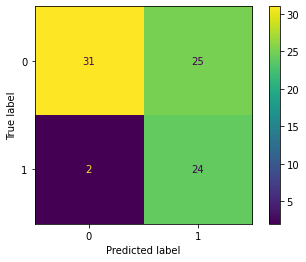


Evaluation: roc


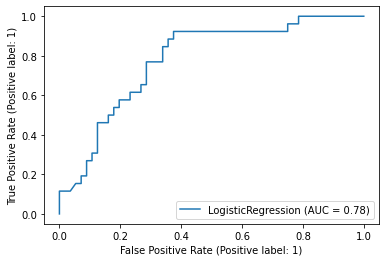

[(0.7751937984496124, 0.6707317073170732),
 (0.8129032258064516, 0.64),
 (0.9767441860465116, 0.9230769230769231),
 (0.6961325966850829, 0.4897959183673469)]

In [23]:
# reload the best model & evaluate
rec_best_model2 = load_model(log_model2, 'recall', ros='ros')
model_eval(rec_best_model2, X_train2, X_test2, y_train2, y_test2, confusion=True, roc=True)